<h1>Introduction To Covid-19</h1>


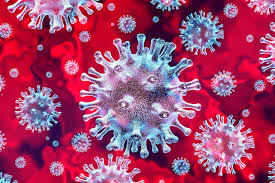

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import Image
Image('index.jpeg')

In [0]:
state_level_data = pd.read_csv('/content/covid-19-state-level-data.csv')
country_level_data = pd.read_csv('/content/covid-19-county-level-data.csv')

In [3]:
state_level_data.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [5]:
country_level_data.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [6]:
state_level_data.describe()

fips         cases        deaths
count  3094.000000    3094.00000   3094.000000
mean     31.319651    5648.32159    240.653846
std      18.313688   21357.34818   1144.787845
min       1.000000       1.00000      0.000000
25%      17.000000      27.00000      0.000000
50%      31.000000     485.50000      8.000000
75%      46.000000    3017.75000     85.750000
max      78.000000  292027.00000  17303.000000

In [7]:
country_level_data.describe()

fips          cases        deaths
count  94270.000000   95420.000000  95420.000000
mean   29799.308592     183.165510      7.799382
std    15457.083261    2180.791781    140.176983
min     1001.000000       0.000000      0.000000
25%    18019.000000       3.000000      0.000000
50%    29005.000000       9.000000      0.000000
75%    45010.500000      38.000000      1.000000
max    56043.000000  160499.000000  11857.000000

In [11]:
state_level_data.style.background_gradient(cmap='Reds')

In [17]:
country_level_data['Total Active Case Country'] = country_level_data['cases'] - country_level_data['deaths']
country_level_active_case = country_level_data['Total Active Case'].sum()
country_level_active_case

16733436

In [18]:
state_level_data['Total Active Case State'] = state_level_data['cases'] - state_level_data['deaths']
state_level_active_case = state_level_data['Total Active Case'].sum()
state_level_active_case

16731324

In [19]:
Total_cases_state = state_level_data.groupby("state")["Total Active Case State"].sum().sort_values(ascending=False).to_frame()
Total_cases_state.style.background_gradient(cmap="Reds")

In [23]:
import plotly
plotly.io.renderers.default = 'colab'

fig = go.Figure()
fig.add_trace(go.Scatter(x=state_level_data['cases'], y = state_level_data['deaths'], mode='lines+markers',name='Cases VS Deaths'))
fig.update_layout(title_text='Covid-19 Cases and Deaths',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# X = Cases
# Y = Deaths

Analyse Cases And Deaths using Time Series Analysis model (fbprphet)

In [0]:
from fbprophet import Prophet

In [0]:
country_cases = country_level_data.groupby('date').sum()['cases'].reset_index()
country_deaths = country_level_data.groupby('date').sum()['deaths'].reset_index()

In [42]:
country_cases.head()

date  cases
0  2020-01-21      1
1  2020-01-22      1
2  2020-01-23      1
3  2020-01-24      2
4  2020-01-25      3

In [0]:
country_cases.columns = ['ds','y']
country_cases['ds'] = pd.to_datetime(country_cases['ds'])

In [44]:
country_deaths.head()

date  deaths
0  2020-01-21       0
1  2020-01-22       0
2  2020-01-23       0
3  2020-01-24       0
4  2020-01-25       0

In [0]:
country_deaths.columns = ['ds','y']
country_deaths['ds'] = pd.to_datetime(country_deaths['ds'])

In [49]:
model = Prophet(interval_width=0.95)           
model.fit(country_cases)                               
future = model.make_future_dataframe(periods=365)     

cases_forecast = model.pforecast = model.predict(future)
cases_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
458 2021-04-23  1.157685e+07  4.360579e+06  1.877946e+07
459 2021-04-24  1.160682e+07  4.349087e+06  1.882160e+07
460 2021-04-25  1.163499e+07  4.350955e+06  1.885706e+07
461 2021-04-26  1.166346e+07  4.351637e+06  1.890017e+07
462 2021-04-27  1.169177e+07  4.353345e+06  1.897872e+07

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cases_forecast['ds'], y=cases_forecast['yhat'], mode='lines+markers', name='forecast_cases',line=dict(color='Red', width=2)))
fig.show()

In [52]:
model_death = Prophet(interval_width=0.95)           
model_death.fit(country_deaths)                               
future_deaths = model_death.make_future_dataframe(periods=365)     

deaths_forecast = model_death.pforecast = model_death.predict(future_deaths)
deaths_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower    yhat_upper
458 2021-04-23  756757.916930  346430.778306  1.191175e+06
459 2021-04-24  758682.461998  347203.732573  1.194923e+06
460 2021-04-25  760461.519221  347920.636785  1.198779e+06
461 2021-04-26  762355.873581  347672.597875  1.201952e+06
462 2021-04-27  764457.765174  348700.836661  1.205728e+06

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=deaths_forecast['ds'], y=deaths_forecast['yhat'], mode='lines+markers', name='forecast_deaths',line=dict(color='blue', width=2)))
fig.show()

In [0]:
## Deaths VS Cases Forecast

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=deaths_forecast['ds'], y=deaths_forecast['yhat'], mode='lines+markers', name='forecast_deaths',line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=cases_forecast['ds'], y=cases_forecast['yhat'], mode='lines+markers', name='forecast_cases',line=dict(color='Red', width=2)))
fig.show()